In [36]:
import deeptrack as dt
import numpy as np

IMAGE_SIZE = 64
sequence_length = 100  # Number of frames per sequence
MIN_SIZE = 1.0e-6
MAX_SIZE = 1.0e-6
MAX_VEL = 10  # Maximum velocity. The higher the trickier!
MAX_PARTICLES = 3  # Max number of particles in each sequence. The higher the trickier!

# Defining properties of the particles
particle = dt.Sphere(
    intensity=lambda: 10 + 10 * np.random.rand(),
    radius=lambda: MIN_SIZE + np.random.rand() * (MAX_SIZE - MIN_SIZE),
    position=lambda: IMAGE_SIZE * np.random.rand(2),
    vel=lambda: MAX_VEL * np.random.rand(2),
    position_unit="pixel",
)

# Defining an update rule for the particle position
def get_position(previous_value, vel):

    newv = previous_value + vel
    for i in range(2):
        if newv[i] > 63:
            newv[i] = 63 - np.abs(newv[i] - 63)
            vel[i] = -vel[i]
        elif newv[i] < 0:
            newv[i] = np.abs(newv[i])
            vel[i] = -vel[i]
    return newv

particle = dt.Sequential(particle, position=get_position)

# Defining properties of the microscope
optics = dt.Fluorescence(
    NA=1,
    output_region=(0, 0, IMAGE_SIZE, IMAGE_SIZE),
    magnification=10,
    resolution=(1e-6, 1e-6, 1e-6),
    wavelength=633e-9,
)

# Combining everything into a dataset.
# Note that the sequences are flipped in different directions, so that each unique sequence defines
# in fact 8 sequences flipped in different directions, to speed up data generation
sequential_images = dt.Sequence(
    optics(particle ** (lambda: 1 + np.random.randint(MAX_PARTICLES))),
    sequence_length=sequence_length,
)
dataset = sequential_images >> dt.FlipUD() >> dt.FlipDiagonal() >> dt.FlipLR()


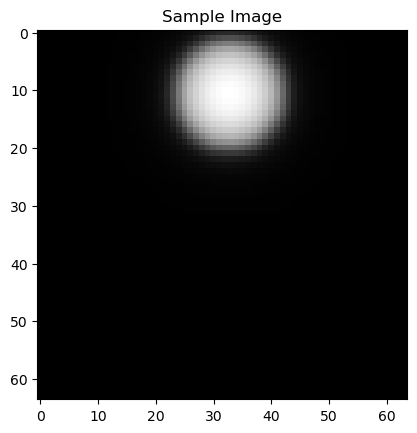

In [37]:
import os
import matplotlib.pyplot as plt

# 定义图像保存路径
images_path = 'images_100_3'

# 创建images文件夹，如果不存在
if not os.path.exists(images_path):
    os.makedirs(images_path)

# 生成图像并保存
images = dataset.update().resolve()

# 确保图像数组是灰度图像
for i, img in enumerate(images):
    if img.ndim == 2:
        plt.imsave(os.path.join(images_path, f"image_{i}.png"), img, cmap='gray')
    else:
        plt.imsave(os.path.join(images_path, f"image_{i}.png"), img[:, :, 0], cmap='gray')

# 显示一个示例图像
plt.imshow(images[0], cmap='gray')
plt.title("Sample Image")
plt.show()

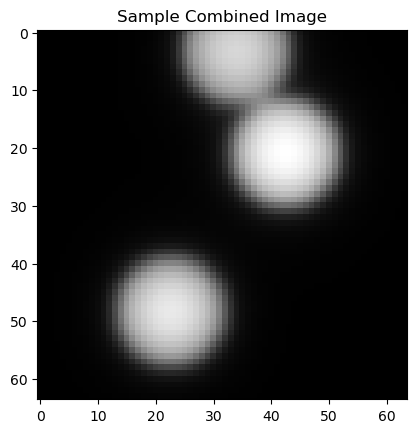

In [42]:
import deeptrack as dt
import numpy as np
import os
import matplotlib.pyplot as plt

IMAGE_SIZE = 64
sequence_length = 10000  # Number of frames per sequence
MIN_SIZE = 1.0e-6
MAX_SIZE = 1.0e-6
MAX_VEL = 10  # Maximum velocity. The higher the trickier!
MAX_PARTICLES = 1  # Max number of particles in each sequence. The higher the trickier!

# Defining properties of the particles
particle = dt.Sphere(
    intensity=lambda: 10 + 10 * np.random.rand(),
    radius=lambda: MIN_SIZE + np.random.rand() * (MAX_SIZE - MIN_SIZE),
    position=lambda: IMAGE_SIZE * np.random.rand(2),
    vel=lambda: MAX_VEL * np.random.rand(2),
    position_unit="pixel",
)

# Defining an update rule for the particle position
def get_position(previous_value, vel):
    newv = previous_value + vel
    for i in range(2):
        if newv[i] > 63:
            newv[i] = 63 - np.abs(newv[i] - 63)
            vel[i] = -vel[i]
        elif newv[i] < 0:
            newv[i] = np.abs(newv[i])
            vel[i] = -vel[i]
    return newv

particle = dt.Sequential(particle, position=get_position)

# Defining properties of the microscope
optics = dt.Fluorescence(
    NA=1,
    output_region=(0, 0, IMAGE_SIZE, IMAGE_SIZE),
    magnification=10,
    resolution=(1e-6, 1e-6, 1e-6),
    wavelength=633e-9,
)

# Combining everything into a dataset.
# Note that the sequences are flipped in different directions, so that each unique sequence defines
# in fact 8 sequences flipped in different directions, to speed up data generation
sequential_images = dt.Sequence(
    optics(particle ** (lambda: 1 + np.random.randint(MAX_PARTICLES))),
    sequence_length=sequence_length,
)
dataset = sequential_images >> dt.FlipUD() >> dt.FlipDiagonal() >> dt.FlipLR()

# 定义图像保存路径
images_path = 'images_10000_3'

# 创建images文件夹，如果不存在
if not os.path.exists(images_path):
    os.makedirs(images_path)

# 生成三次图像序列
images_list = [dataset.update().resolve() for _ in range(3)]

# 叠加三次图像序列
combined_images = np.zeros_like(images_list[0])
for images in images_list:
    combined_images += images

# 确保图像数组是灰度图像并保存
for i, img in enumerate(combined_images):
    if img.ndim == 2:
        plt.imsave(os.path.join(images_path, f"image_{i}.png"), img, cmap='gray')
    else:
        plt.imsave(os.path.join(images_path, f"image_{i}.png"), img[:, :, 0], cmap='gray')

# 显示一个示例图像
plt.imshow(combined_images[0], cmap='gray')
plt.title("Sample Combined Image")
plt.show()
